In [40]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch.optim import SGD
from torch.nn import BCEWithLogitsLoss
from torch.nn import MSELoss
from torch.nn import L1Loss
import tensorflow as tf
import torch.nn.functional as F
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
df=pd.read_csv(r'/content/Womens Clothing E-Commerce Reviews (1).csv')

In [20]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
df=df.drop(['Unnamed: 0'],axis=1)

In [22]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [23]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

<Axes: >

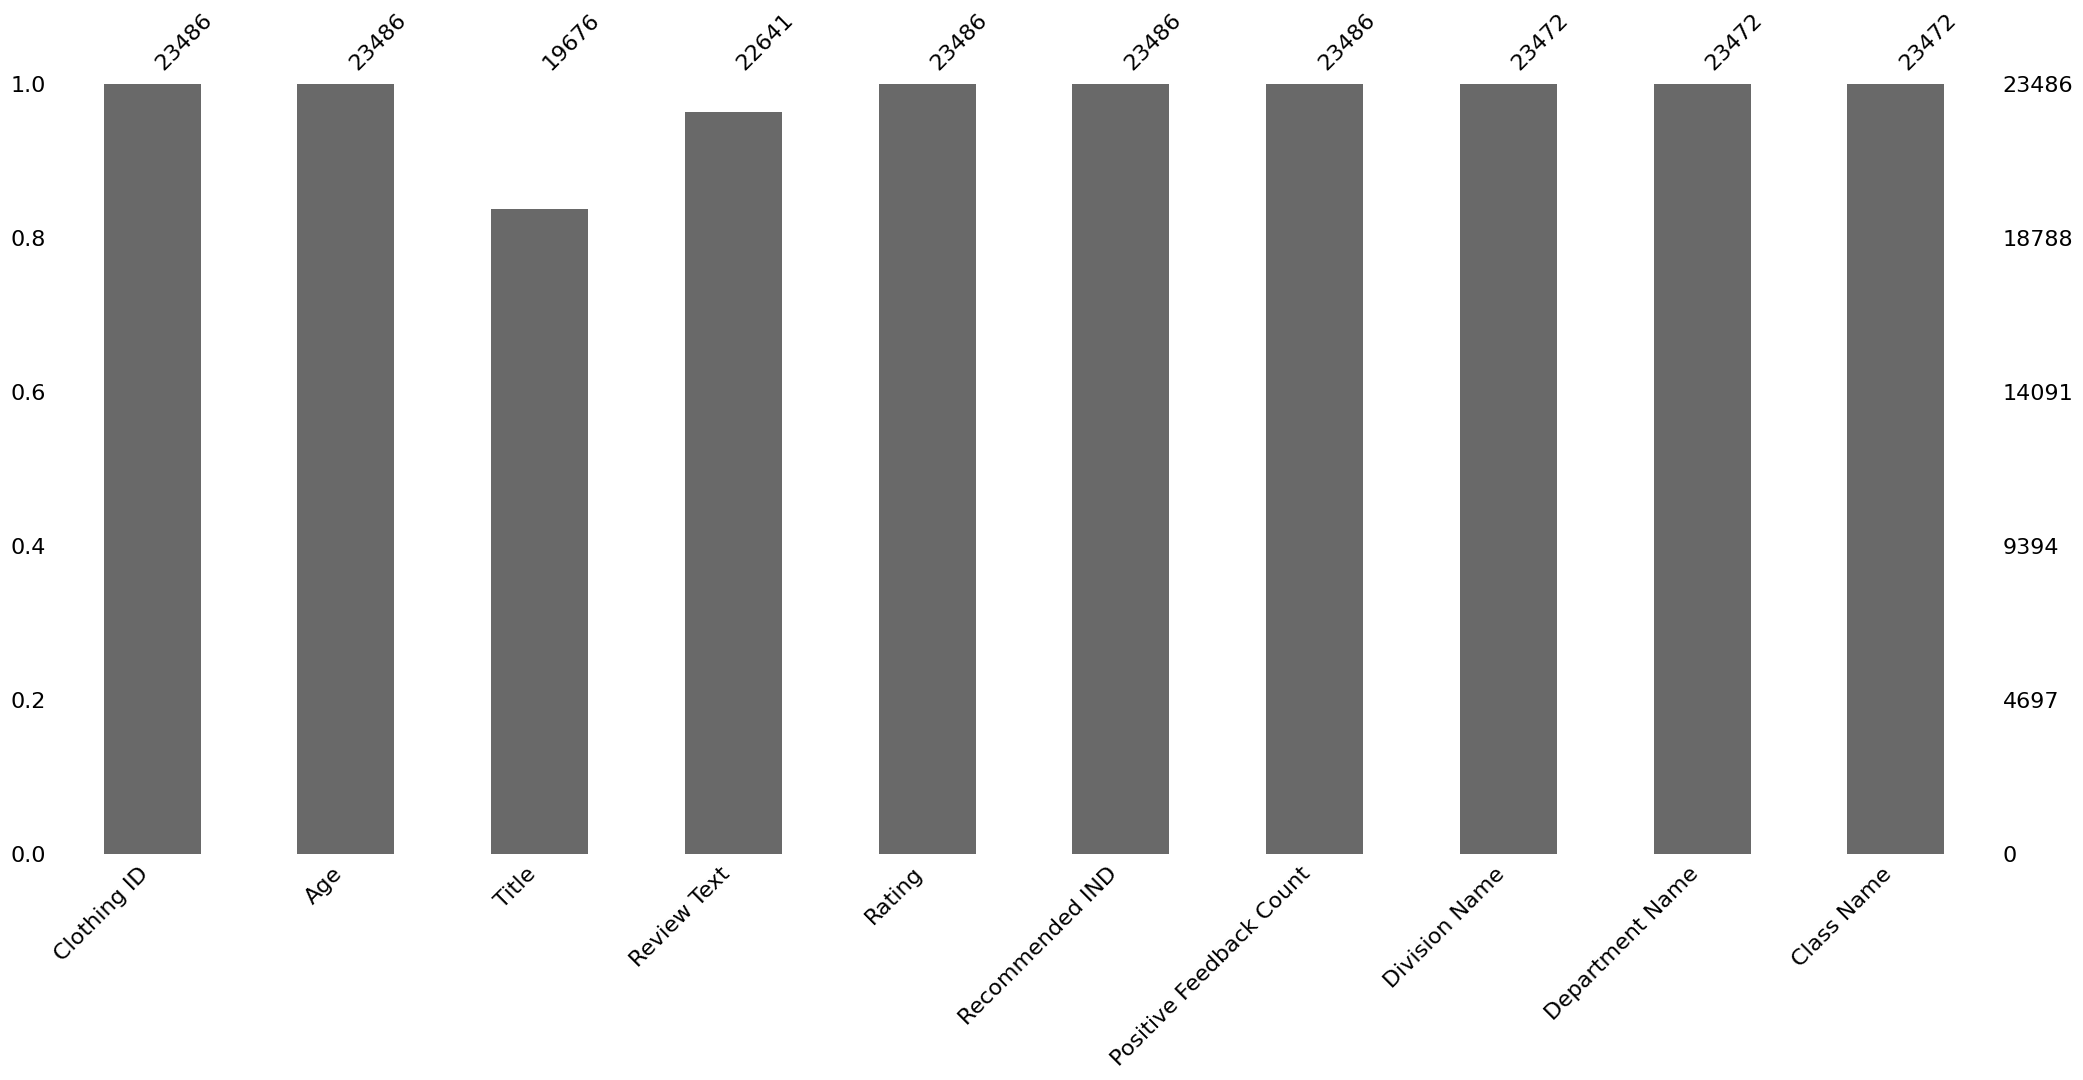

In [24]:
msno.bar(df)

<Axes: >

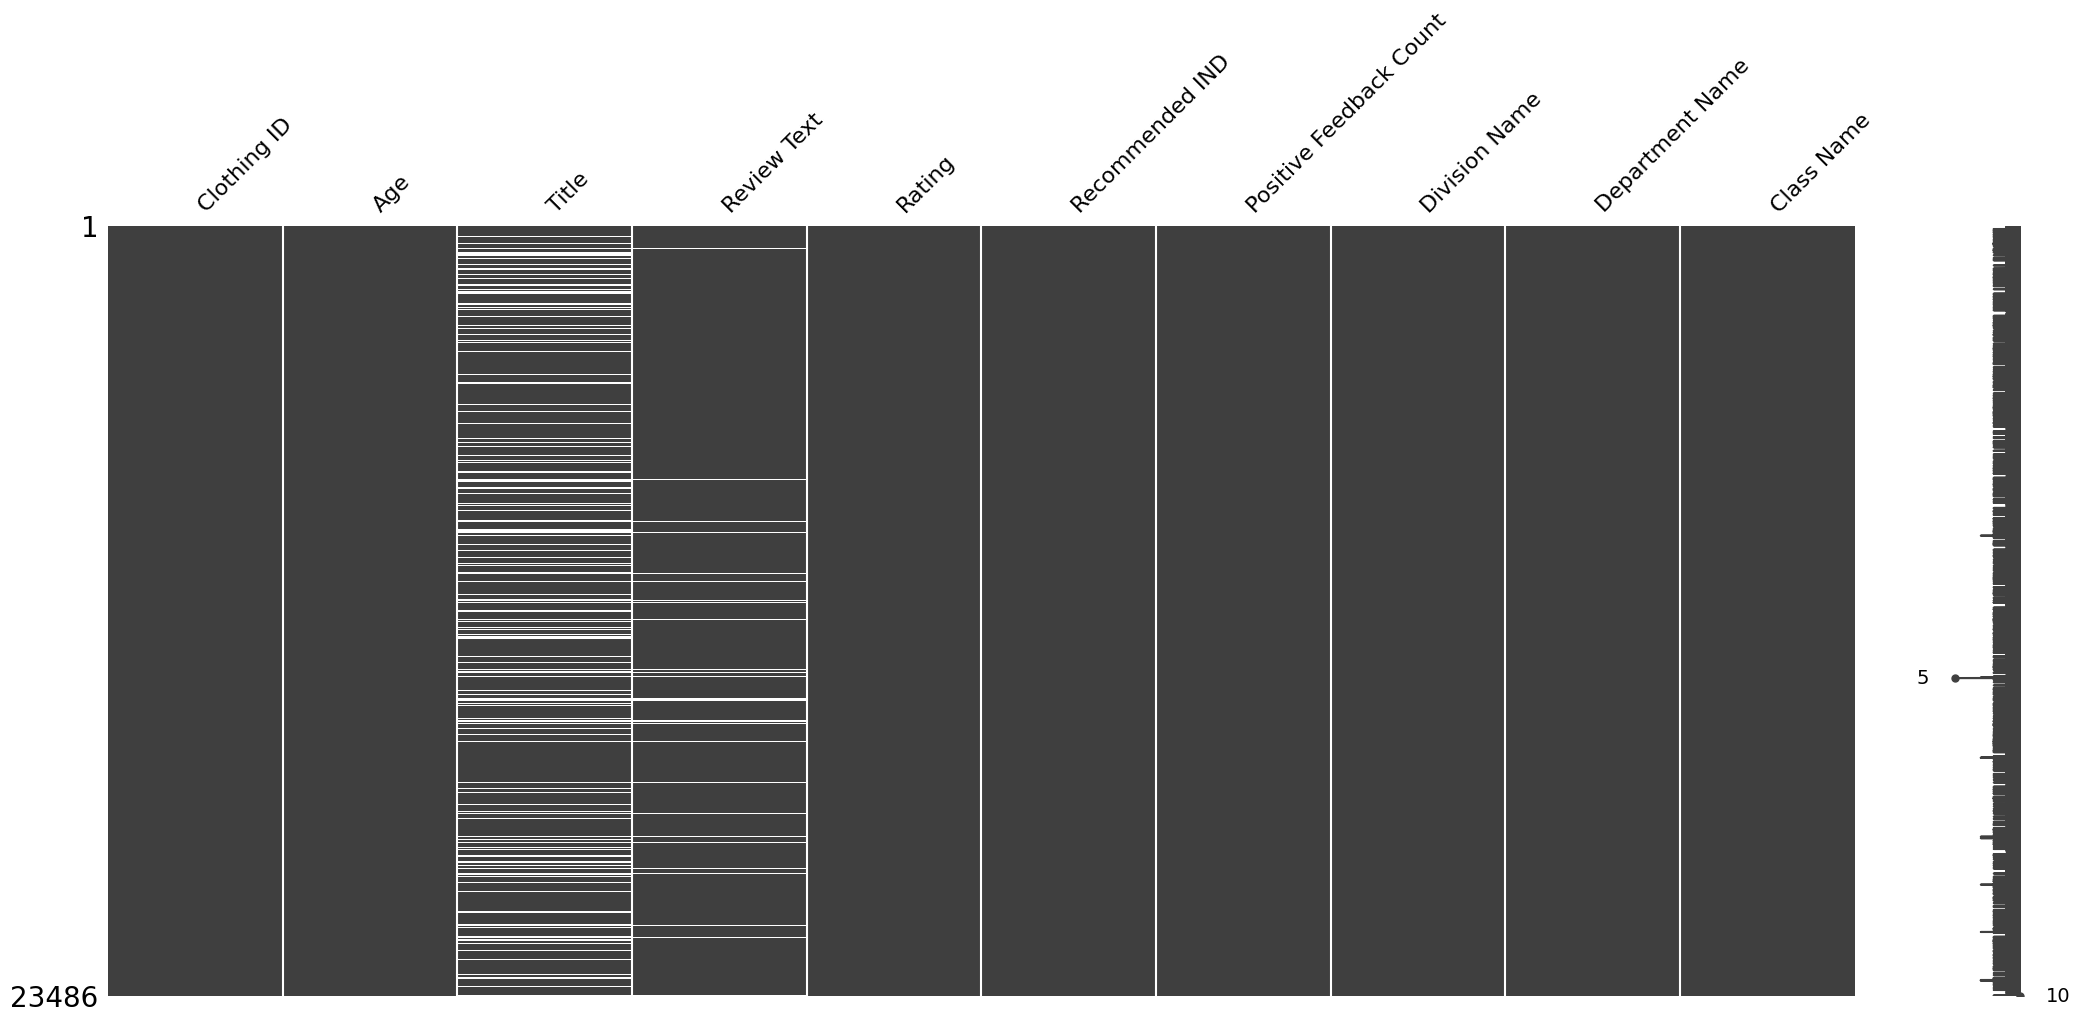

In [25]:
msno.matrix(df)

In [26]:
#df=df.dropna()
df.dropna(subset=['Review Text'], inplace=True)

In [27]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [28]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [29]:
df.reset_index(inplace = True)

In [30]:
df.head()

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [31]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22641, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

df['Review Text'] = df['Review Text'].apply(preprocess_text)


word2vec = Word2Vec(sentences=df['Review Text'], vector_size=100, window=5, min_count=1, workers=4)

def words_to_vec(words):
    return [word2vec.wv[word] for word in words]

df['Review Text'] = df['Review Text'].apply(words_to_vec)


df['Sentiment'] = df['Rating'].apply(lambda rating : 1 if rating >= 3 else 0)


from keras.utils import pad_sequences
df['Review Text'] = pad_sequences(df['Review Text'], dtype='float32', padding='post').tolist()


train, valid = train_test_split(df, test_size=0.2, random_state=42)


batch_size = 32

train_data = TensorDataset(torch.tensor(train['Review Text'].tolist(), dtype=torch.float32), torch.tensor(train['Sentiment'].tolist(), dtype=torch.float32))
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

valid_data = TensorDataset(torch.tensor(valid['Review Text'].tolist(), dtype=torch.float32), torch.tensor(valid['Sentiment'].tolist(), dtype=torch.float32))
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 1, Train Loss: 0.3509760402774853, Train Acc: 0.8876435512367491, Valid Loss: 0.3273244116612723, Valid Acc: 0.8992336371415098
Epoch: 2, Train Loss: 0.339878830005655, Train Acc: 0.8943794169611308, Valid Loss: 0.3299282243029332, Valid Acc: 0.8990394573816112
Epoch: 3, Train Loss: 0.31354981837234736, Train Acc: 0.8943794169611308, Valid Loss: 0.24820045397525103, Valid Acc: 0.8988452776217125
Epoch: 4, Train Loss: 0.2516078588161157, Train Acc: 0.8931647526501767, Valid Loss: 0.2338559632255158, Valid Acc: 0.8984310274392786
Epoch: 5, Train Loss: 0.23167210752177364, Train Acc: 0.8974712897526502, Valid Loss: 0.21738665275485583, Valid Acc: 0.9018744822119323
Epoch: 6, Train Loss: 0.2223442683305736, Train Acc: 0.9032133392226148, Valid Loss: 0.217095739457389, Valid Acc: 0.903635045592214
Epoch: 7, Train Loss: 0.21324015718098244, Train Acc: 0.9050905477031802, Valid Loss: 0.20903111149517584, Valid Acc: 0.9067419221703436
Epoch: 8, Train Loss: 0.20596509587427753, Train Acc

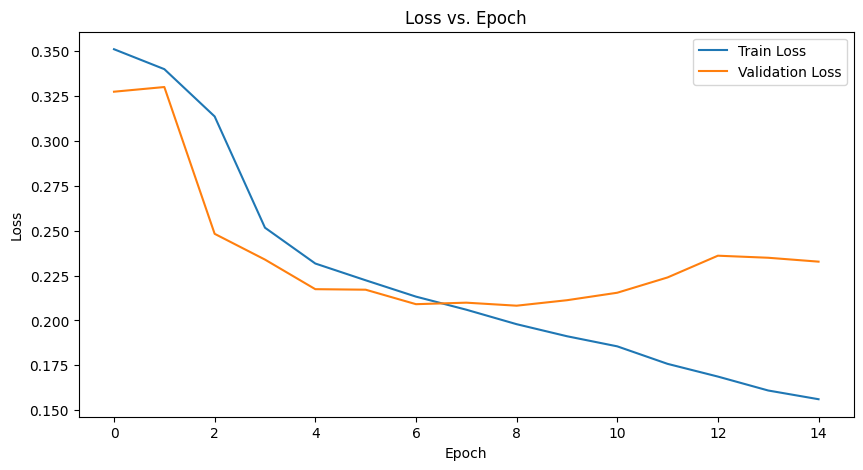

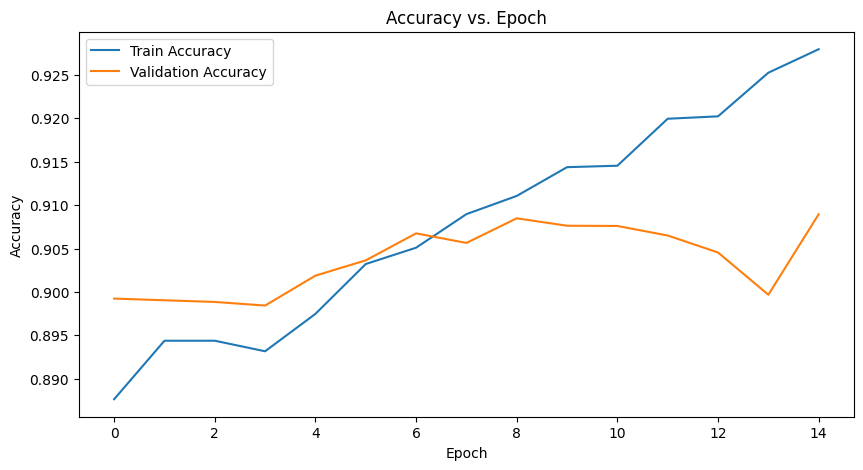

In [ ]:
class SentimentAnalysisModel1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        output, (hidden, _) = self.rnn(x)
        hidden = self.dropout(hidden[-1,:,:])
        output = self.fc(hidden)
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentAnalysisModel1(input_dim=100, hidden_dim=64, output_dim=1, n_layers=1, dropout=0.2)
model = model.to(device)


criterion = BCEWithLogitsLoss()
optimizer = Adam(model.parameters())

def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))

    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc
import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 15
for epoch in range(epochs):

    model.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[ 194  263]
 [ 149 3923]]


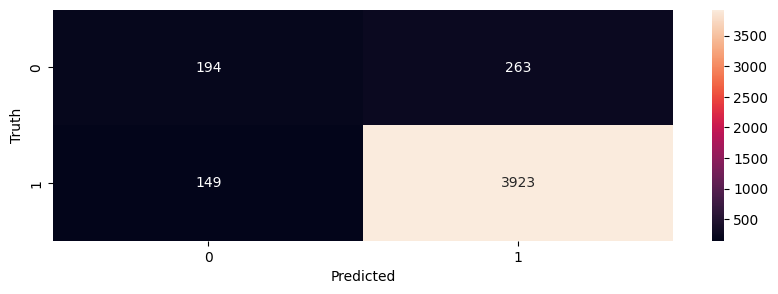

In [ ]:
from sklearn.metrics import confusion_matrix


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 1, Train Loss: 0.11549340906905096, Train Acc: 0.8943794169611308, Valid Loss: 0.09385862445432536, Valid Acc: 0.8992336371415098
Epoch: 2, Train Loss: 0.09484197012915575, Train Acc: 0.8943794169611308, Valid Loss: 0.07948251909897729, Valid Acc: 0.8988452776217125
Epoch: 3, Train Loss: 0.09554680349558671, Train Acc: 0.8943794169611308, Valid Loss: 0.08970989923084706, Valid Acc: 0.8994278169014085
Epoch: 4, Train Loss: 0.0837814127664368, Train Acc: 0.8943794169611308, Valid Loss: 0.07517266949691193, Valid Acc: 0.8992336371415098
Epoch: 5, Train Loss: 0.07868160283712954, Train Acc: 0.8943794169611308, Valid Loss: 0.0746298498264186, Valid Acc: 0.8988452776217125
Epoch: 6, Train Loss: 0.07670326460343736, Train Acc: 0.8943794169611308, Valid Loss: 0.06887094078349396, Valid Acc: 0.8992336371415098
Epoch: 7, Train Loss: 0.07303139780954106, Train Acc: 0.8943794169611308, Valid Loss: 0.0692703699115926, Valid Acc: 0.8990394573816112
Epoch: 8, Train Loss: 0.07052903210698189, T

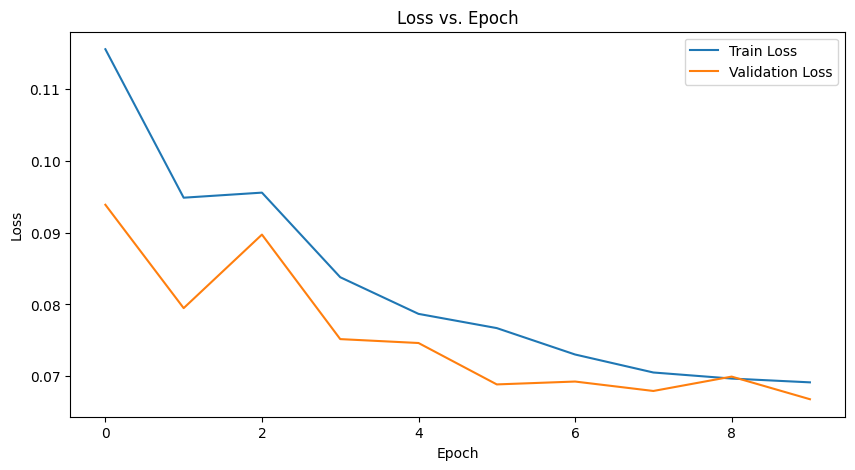

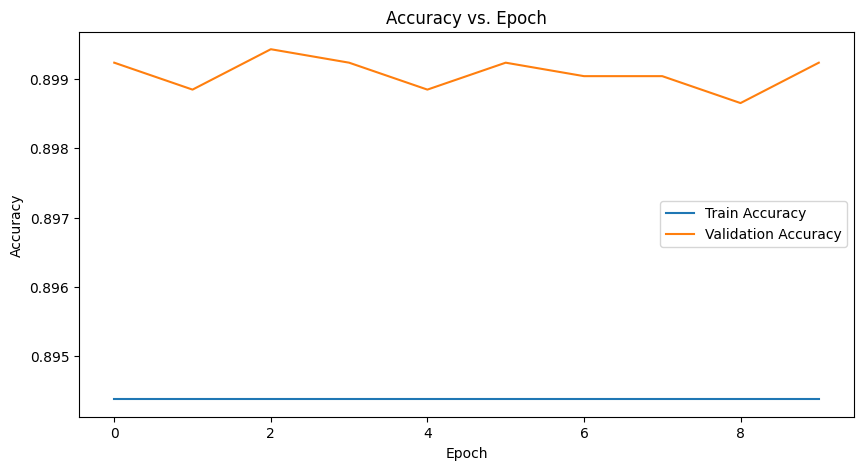

In [33]:

class SentimentAnalysisModel1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        output, (hidden, _) = self.rnn(x)
        hidden = self.dropout(hidden[-1,:,:])
        output = self.fc(hidden)
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentAnalysisModel1(input_dim=100, hidden_dim=64, output_dim=1, n_layers=1, dropout=0.2)
model = model.to(device)


criterion = MSELoss()
optimizer = Adam(model.parameters())

def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))

    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc
import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):

    model.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[   0  457]
 [   0 4072]]


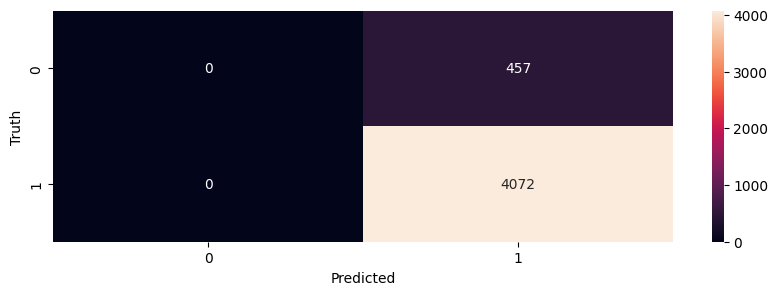

In [34]:
from sklearn.metrics import confusion_matrix


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 1, Train Loss: 0.18112183187828257, Train Acc: 0.893219964664311, Valid Loss: 0.11992006691198953, Valid Acc: 0.8992336371415098
Epoch: 2, Train Loss: 0.1463378593720522, Train Acc: 0.8943794169611308, Valid Loss: 0.1120839869328053, Valid Acc: 0.8994278169014085
Epoch: 3, Train Loss: 0.14098992615003572, Train Acc: 0.8943794169611308, Valid Loss: 0.1056523919236702, Valid Acc: 0.8990394573816112
Epoch: 4, Train Loss: 0.1368555205844527, Train Acc: 0.8943794169611308, Valid Loss: 0.10258224365813001, Valid Acc: 0.8994278169014085
Epoch: 5, Train Loss: 0.132265314206402, Train Acc: 0.8943794169611308, Valid Loss: 0.11080752011441009, Valid Acc: 0.8992336371415098
Epoch: 6, Train Loss: 0.1278446783466337, Train Acc: 0.8943794169611308, Valid Loss: 0.1135365724642302, Valid Acc: 0.8992336371415098
Epoch: 7, Train Loss: 0.12356128768054209, Train Acc: 0.894434628975265, Valid Loss: 0.10574515041908328, Valid Acc: 0.8990394573816112
Epoch: 8, Train Loss: 0.1193259603347195, Train Acc

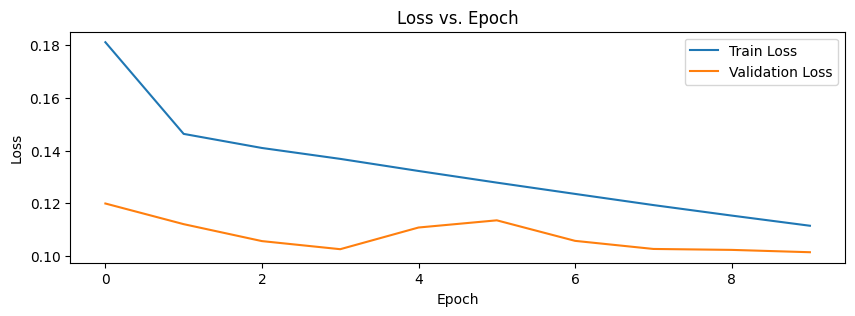

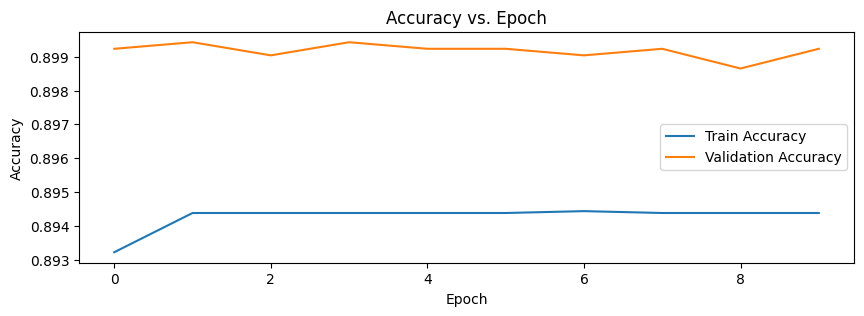

In [35]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentAnalysisModel1(input_dim=100, hidden_dim=64, output_dim=1, n_layers=1, dropout=0.2)
model = model.to(device)


criterion = L1Loss()
optimizer = Adam(model.parameters())

def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))

    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc
import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):

    model.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(10, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[   0  457]
 [   0 4072]]


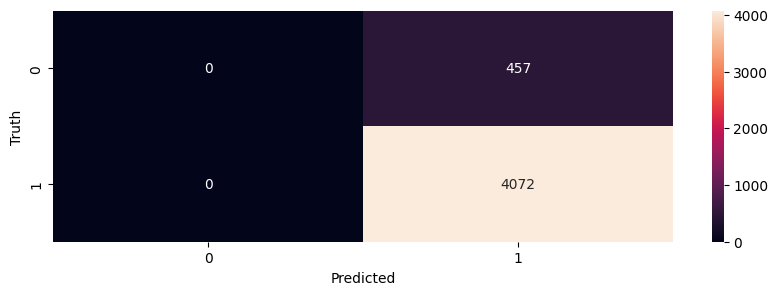

In [36]:
from sklearn.metrics import confusion_matrix


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 1, Train Loss: 0.17052706373138057, Train Acc: 0.8943794169611308, Valid Loss: 0.10803169583980467, Valid Acc: 0.8988452776217125
Epoch: 2, Train Loss: 0.11570723732610895, Train Acc: 0.8943794169611308, Valid Loss: 0.10188545226316217, Valid Acc: 0.8992336371415098
Epoch: 3, Train Loss: 0.1110857194783199, Train Acc: 0.8943794169611308, Valid Loss: 0.10392676713273034, Valid Acc: 0.8994278169014085
Epoch: 4, Train Loss: 0.1094645118182887, Train Acc: 0.8943794169611308, Valid Loss: 0.10708856666591805, Valid Acc: 0.8988452776217125
Epoch: 5, Train Loss: 0.10975492306632835, Train Acc: 0.8943794169611308, Valid Loss: 0.10488587199434848, Valid Acc: 0.8992336371415098
Epoch: 6, Train Loss: 0.10977983311832266, Train Acc: 0.8943794169611308, Valid Loss: 0.10315638493326768, Valid Acc: 0.8990394573816112
Epoch: 7, Train Loss: 0.10971997104019138, Train Acc: 0.8943794169611308, Valid Loss: 0.10775615054536873, Valid Acc: 0.8992336371415098
Epoch: 8, Train Loss: 0.10973965306519515, 

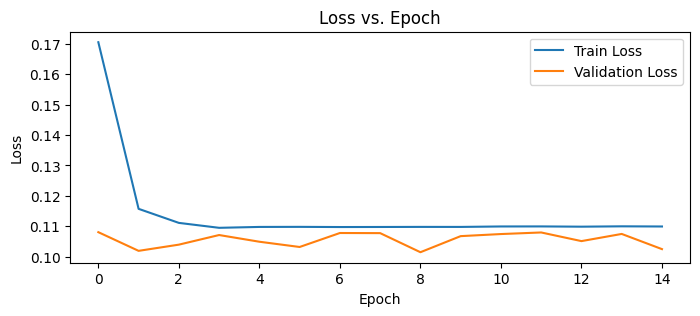

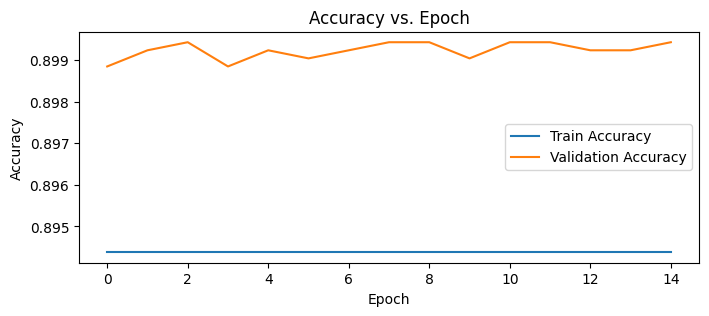

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentAnalysisModel1(input_dim=100, hidden_dim=64, output_dim=1, n_layers=1, dropout=0.2)
model = model.to(device)



criterion = L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))

    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 15
for epoch in range(epochs):

    model.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[   0  457]
 [   0 4072]]


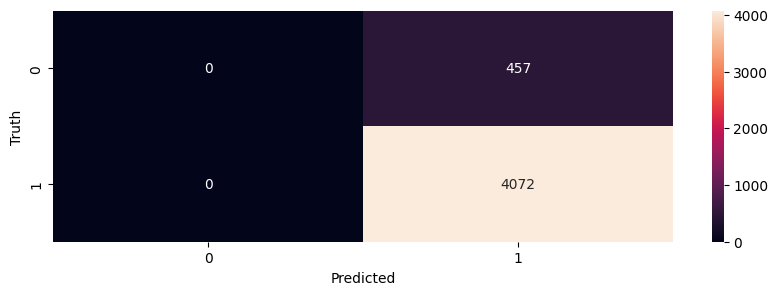

In [38]:
from sklearn.metrics import confusion_matrix


model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Epoch: 1, Train Loss: 0.2767715464303329, Train Acc: 0.8929991166077739, Valid Loss: 0.24185229155799032, Valid Acc: 0.9016803024520337
Epoch: 2, Train Loss: 0.23623991826740043, Train Acc: 0.8982442579505301, Valid Loss: 0.24969240204549173, Valid Acc: 0.9001398094942872
Epoch: 3, Train Loss: 0.21416012890136704, Train Acc: 0.9061947879858657, Valid Loss: 0.25049685707814257, Valid Acc: 0.9001657001569238
Epoch: 4, Train Loss: 0.1927294178434743, Train Acc: 0.9128202296819788, Valid Loss: 0.26319123668150163, Valid Acc: 0.8920230945231209
Epoch: 5, Train Loss: 0.16910098806392176, Train Acc: 0.9262919611307421, Valid Loss: 0.28173784916879424, Valid Acc: 0.8974730737612281
Epoch: 6, Train Loss: 0.1396183607007242, Train Acc: 0.9419169611307421, Valid Loss: 0.3208646729562274, Valid Acc: 0.8943920878457351
Epoch: 7, Train Loss: 0.11002782548945594, Train Acc: 0.9566033568904594, Valid Loss: 0.339561446989611, Valid Acc: 0.8878417564949519
Epoch: 8, Train Loss: 0.09280944715974714, Trai

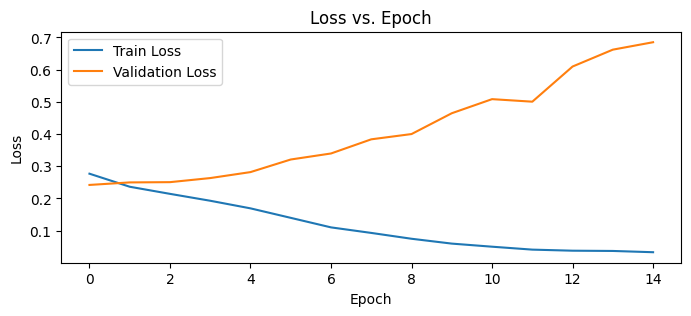

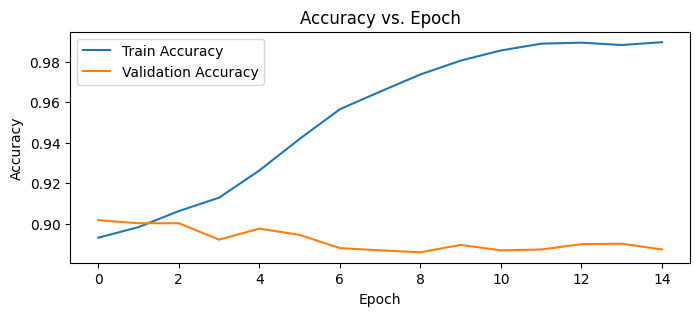

In [41]:
class SentimentAnalysisModel12(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model1 = SentimentAnalysisModel12(input_dim=100*63, hidden_dim=64, output_dim=1, dropout=0.2)
Model1 = Model1.to(device)


criterion = BCEWithLogitsLoss()
optimizer = Adam(Model1.parameters())

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 15
for epoch in range(epochs):

    Model1.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = Model1(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    Model1.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = Model1(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[ 103  354]
 [ 156 3916]]


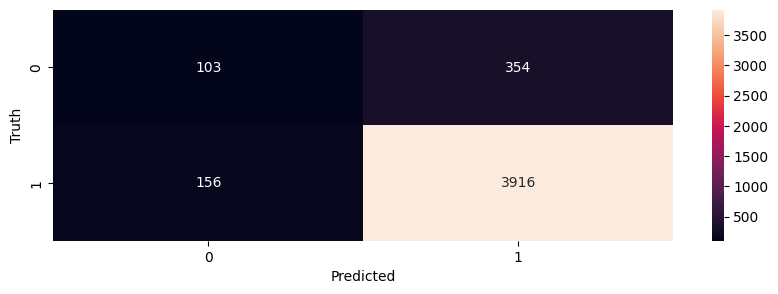

In [42]:
from sklearn.metrics import confusion_matrix


Model1.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = Model1(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Epoch: 1, Train Loss: 0.10235736707008243, Train Acc: 0.8941033568904594, Valid Loss: 0.08265023163034463, Valid Acc: 0.8988452776217125
Epoch: 2, Train Loss: 0.0837465991354926, Train Acc: 0.8943794169611308, Valid Loss: 0.08220877784343672, Valid Acc: 0.8992336371415098
Epoch: 3, Train Loss: 0.07799699340120958, Train Acc: 0.8943794169611308, Valid Loss: 0.08069273838642198, Valid Acc: 0.8992336371415098
Epoch: 4, Train Loss: 0.07341846236268013, Train Acc: 0.8943794169611308, Valid Loss: 0.07982974743444315, Valid Acc: 0.8992336371415098
Epoch: 5, Train Loss: 0.06938071935618619, Train Acc: 0.8943794169611308, Valid Loss: 0.07972696284488054, Valid Acc: 0.8990394573816112
Epoch: 6, Train Loss: 0.06492181002349978, Train Acc: 0.8943794169611308, Valid Loss: 0.07960670874257322, Valid Acc: 0.8994278169014085
Epoch: 7, Train Loss: 0.06014796907687724, Train Acc: 0.8946554770318021, Valid Loss: 0.07951001649801161, Valid Acc: 0.8992077464788732
Epoch: 8, Train Loss: 0.05493587730353692,

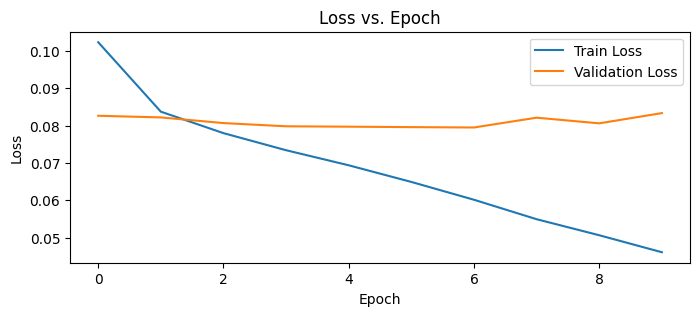

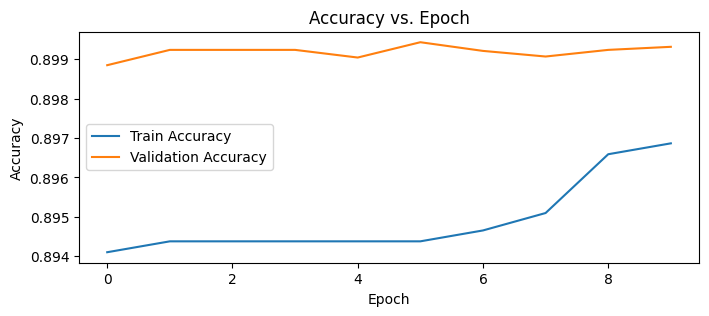

In [43]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model1 = SentimentAnalysisModel12(input_dim=100*63, hidden_dim=64, output_dim=1, dropout=0.2)
Model1 = Model1.to(device)


criterion = MSELoss()
optimizer = SGD(Model1.parameters(), lr=0.01)

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):

    Model1.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = Model1(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    Model1.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = Model1(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[   5  452]
 [   2 4070]]


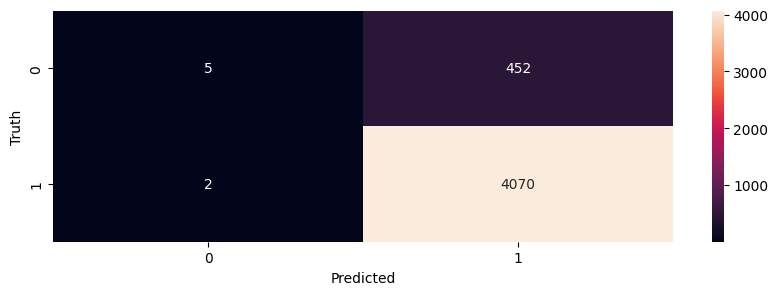

In [44]:
from sklearn.metrics import confusion_matrix


Model1.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = Model1(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Epoch: 1, Train Loss: 0.2608758605648056, Train Acc: 0.897416077738516, Valid Loss: 0.22551065428890812, Valid Acc: 0.9049813587900618
Epoch: 2, Train Loss: 0.22357959863680413, Train Acc: 0.9070781802120141, Valid Loss: 0.21386947650724733, Valid Acc: 0.9069878832555153
Epoch: 3, Train Loss: 0.2025623074847902, Train Acc: 0.915083922261484, Valid Loss: 0.21420523209471098, Valid Acc: 0.9056933513829406
Epoch: 4, Train Loss: 0.18394006302007623, Train Acc: 0.9227031802120141, Valid Loss: 0.21308390473500943, Valid Acc: 0.9080882353681914
Epoch: 5, Train Loss: 0.16693020050410615, Train Acc: 0.9293286219081273, Valid Loss: 0.21955246318289093, Valid Acc: 0.9027806545647097
Epoch: 6, Train Loss: 0.14684348685054813, Train Acc: 0.9392115724381626, Valid Loss: 0.24508068423954324, Valid Acc: 0.9071561723527773
Epoch: 7, Train Loss: 0.12807129695641317, Train Acc: 0.9480454946996466, Valid Loss: 0.26248907657261467, Valid Acc: 0.9067419221703436
Epoch: 8, Train Loss: 0.11446892144158483, Tr

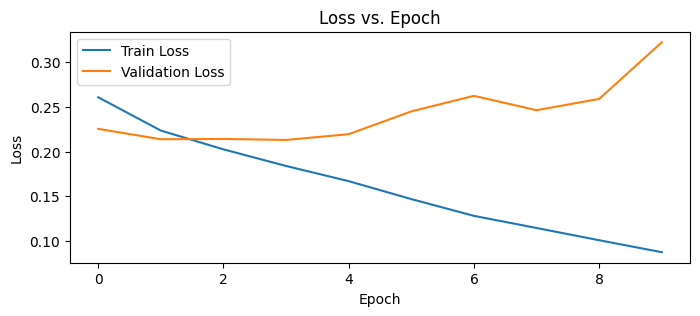

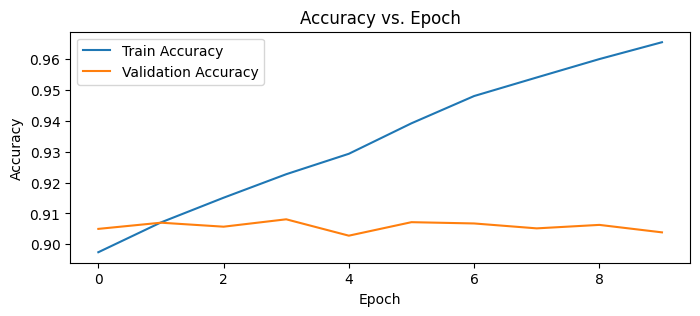

In [45]:
class SentimentAnalysisModel23(nn.Module):
    def __init__(self, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels = 1, out_channels = n_filters,
                      kernel_size = (fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.unsqueeze(1)
        conved = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim = 1))
        return self.fc(cat)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model2 = SentimentAnalysisModel23(embedding_dim=100, n_filters=64, filter_sizes=[3,4,5], output_dim=1, dropout=0.2)
Model2 = Model2.to(device)

criterion = BCEWithLogitsLoss()
optimizer = Adam(Model2.parameters())

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):

    Model2.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = Model2(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    Model2.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = Model2(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[ 103  354]
 [  82 3990]]


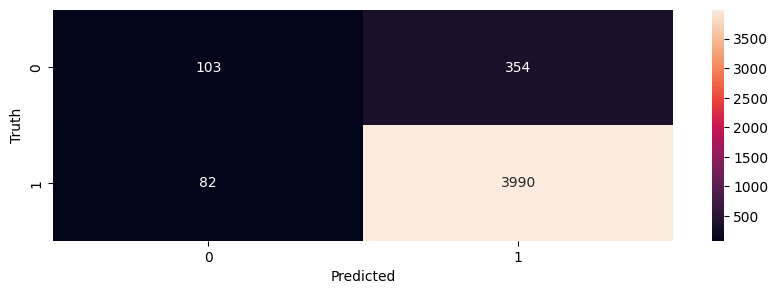

In [46]:
from sklearn.metrics import confusion_matrix


Model2.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = Model2(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Epoch: 1, Train Loss: 0.6077972129480946, Train Acc: 0.8780918727915195, Valid Loss: 0.09061034086724402, Valid Acc: 0.8990394573816112
Epoch: 2, Train Loss: 0.09159700911452619, Train Acc: 0.8943242049469965, Valid Loss: 0.08418163076095597, Valid Acc: 0.8994278169014085
Epoch: 3, Train Loss: 0.08605522787784203, Train Acc: 0.8943794169611308, Valid Loss: 0.08016545083504957, Valid Acc: 0.8990394573816112
Epoch: 4, Train Loss: 0.08376239998720245, Train Acc: 0.8943794169611308, Valid Loss: 0.07969827316439068, Valid Acc: 0.8990394573816112
Epoch: 5, Train Loss: 0.08173188089241698, Train Acc: 0.894434628975265, Valid Loss: 0.07684774641734614, Valid Acc: 0.8994278169014085
Epoch: 6, Train Loss: 0.0811502384367422, Train Acc: 0.894434628975265, Valid Loss: 0.07764127241893554, Valid Acc: 0.8982627383420165
Epoch: 7, Train Loss: 0.08004438220408117, Train Acc: 0.8946002650176679, Valid Loss: 0.07662145282522263, Valid Acc: 0.8988452776217125
Epoch: 8, Train Loss: 0.07943767521451409, Tr

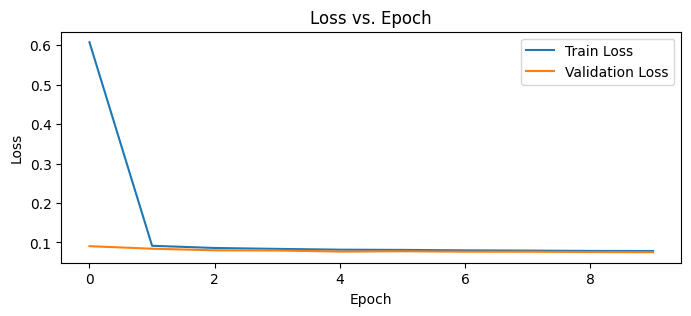

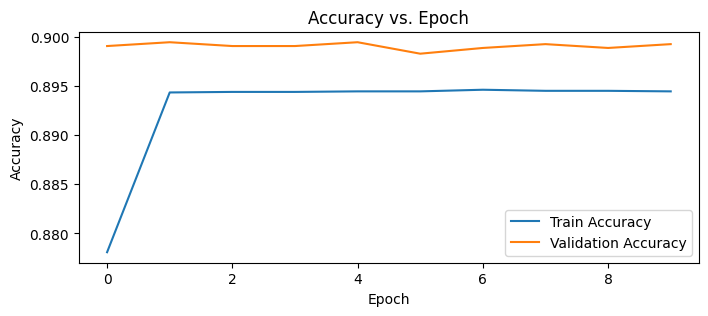

In [47]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model2 = SentimentAnalysisModel23(embedding_dim=100, n_filters=64, filter_sizes=[3,4,5], output_dim=1, dropout=0.2)
Model2 = Model2.to(device)


criterion = MSELoss()
optimizer = SGD(Model2.parameters(), lr=0.03)

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


import matplotlib.pyplot as plt


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):

    Model2.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = Model2(inputs).squeeze()
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output, labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))


    Model2.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = Model2(inputs).squeeze()
            loss = criterion(output, labels)

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output, labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Confusion Matrix:
[[   0  457]
 [   0 4072]]


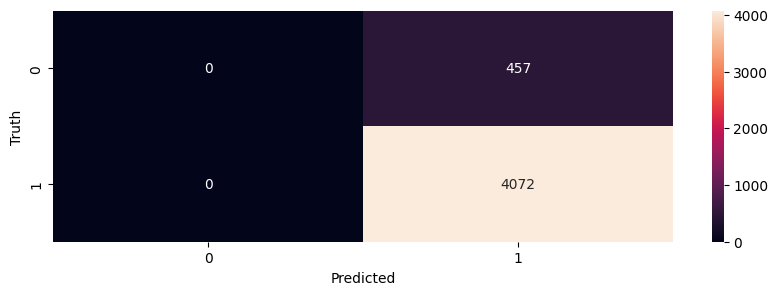

In [48]:
from sklearn.metrics import confusion_matrix


Model2.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = Model2(inputs).squeeze()

        preds = torch.round(torch.sigmoid(output))
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_mat = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_mat)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
!pip install transformers


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch: 1, Train Loss: 0.2275608757333073, Train Acc: 0.9066916961130742, Valid Loss: 0.1793565220711097, Valid Acc: 0.9199202568598197
Epoch: 2, Train Loss: 0.15408018719760352, Train Acc: 0.9339664310954063, Valid Loss: 0.20596835232326682, Valid Acc: 0.9186516156498815
Epoch: 3, Train Loss: 0.10125017695436617, Train Acc: 0.9598608657243817, Valid Loss: 0.22175187934321208, Valid Acc: 0.9205545774647887
Epoch: 4, Train Loss: 0.055894660381287625, Train Acc: 0.9794611307420494, Valid Loss: 0.31381101186328214, Valid Acc: 0.918159693479538
Epoch: 5, Train Loss: 0.03811140028206967, Train Acc: 0.9874116607773852, Valid Loss: 0.29630880109952684, Valid Acc: 0.9088908450704225
Epoch: 6, Train Loss: 0.02355689312610693, Train Acc: 0.9927672261484098, Valid Loss: 0.35199252429232164, Valid Acc: 0.9124378624936225
Epoch: 7, Train Loss: 0.01948381674670542, Train Acc: 0.9938162544169611, Valid Loss: 0.3923291077937367, Valid Acc: 0.9175512635372054
Epoch: 8, Train Loss: 0.012342128980678158, 

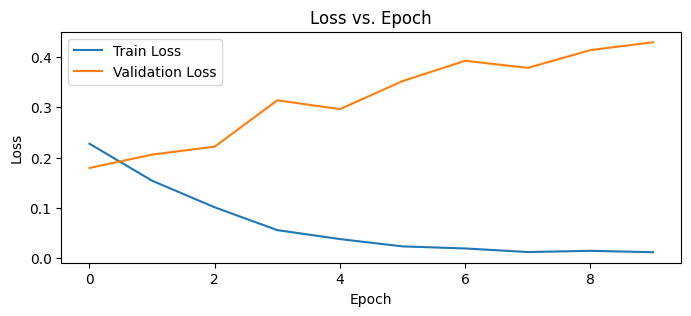

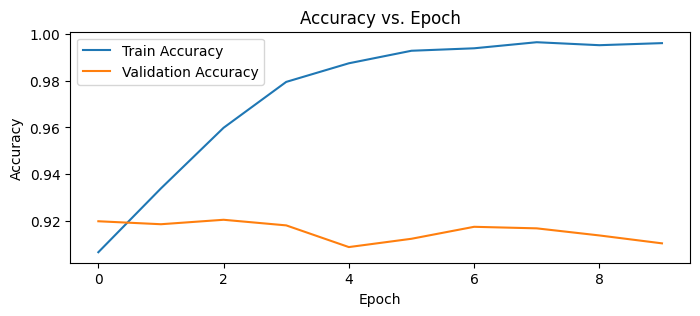

In [ ]:
import pandas as pd
import numpy as np
!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn.functional as F
from torch.nn import BCEWithLogitsLoss
import matplotlib.pyplot as plt


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

df['Sentiment'] = df['Rating'].apply(lambda rating: 1 if rating >= 3 else 0)


input_ids = []
attention_masks = []

for review in df['Review Text']:
    encoded_dict = tokenizer.encode_plus(
                        review,
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(df['Sentiment'].values)


train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.2)
train_masks, valid_masks, _, _ = train_test_split(attention_masks, labels, random_state=42, test_size=0.2)

batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

valid_data = TensorDataset(valid_inputs, valid_masks, valid_labels)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1,
    output_attentions = False,
    output_hidden_states = False,
)

model = model.to(device)


optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8)

criterion = BCEWithLogitsLoss()


def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    for batch in train_loader:
        inputs, masks, labels = batch
        inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs, token_type_ids=None, attention_mask=masks)
        loss = criterion(output.logits.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output.logits.squeeze(), labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))

    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for batch in valid_loader:
            inputs, masks, labels = batch
            inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
            output = model(inputs, token_type_ids=None, attention_mask=masks)
            loss = criterion(output.logits.squeeze(), labels.float())

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output.logits.squeeze(), labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ber

Epoch: 1, Train Loss: 0.2158457358028779, Train Acc: 0.8909562720848057, Valid Loss: 0.1653573510407562, Valid Acc: 0.8990394573816112
Epoch: 2, Train Loss: 0.1511442707950256, Train Acc: 0.8943794169611308, Valid Loss: 0.1442630512928459, Valid Acc: 0.8992336371415098
Epoch: 3, Train Loss: 0.133721341925275, Train Acc: 0.8943794169611308, Valid Loss: 0.12500988702538987, Valid Acc: 0.8994278169014085
Epoch: 4, Train Loss: 0.12226924968574052, Train Acc: 0.8943794169611308, Valid Loss: 0.10698980563910494, Valid Acc: 0.8992336371415098
Epoch: 5, Train Loss: 0.11601628534587975, Train Acc: 0.8943794169611308, Valid Loss: 0.10896014638612388, Valid Acc: 0.8990394573816112
Epoch: 6, Train Loss: 0.11330856183747837, Train Acc: 0.8943794169611308, Valid Loss: 0.10799913905875784, Valid Acc: 0.8990394573816112
Epoch: 7, Train Loss: 0.11164472105356703, Train Acc: 0.8943794169611308, Valid Loss: 0.10845677997969405, Valid Acc: 0.8984569181019152
Epoch: 8, Train Loss: 0.1107067099736194, Train

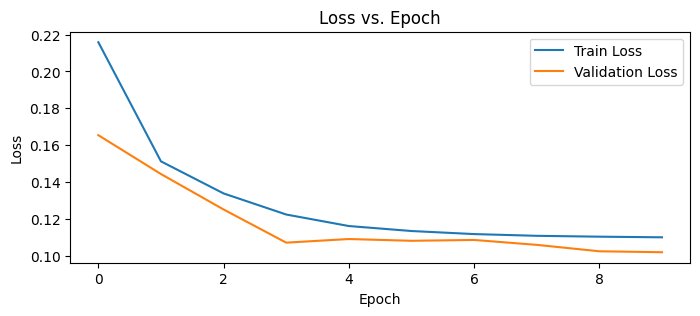

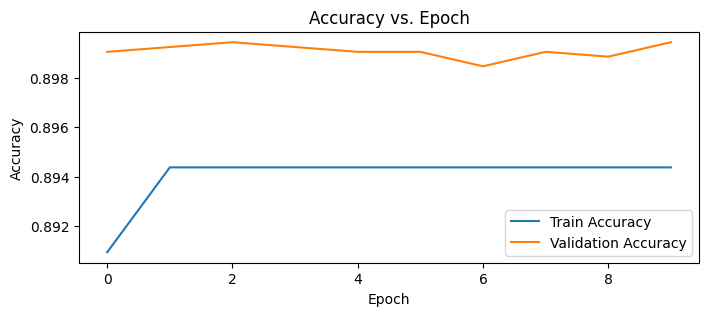

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn.functional as F
from torch.nn import L1Loss
import matplotlib.pyplot as plt


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


df['Sentiment'] = df['Rating'].apply(lambda rating: 1 if rating >= 3 else 0)


input_ids = []
attention_masks = []

for review in df['Review Text']:
    encoded_dict = tokenizer.encode_plus(
                        review,
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(df['Sentiment'].values)


train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.2)
train_masks, valid_masks, _, _ = train_test_split(attention_masks, labels, random_state=42, test_size=0.2)

batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

valid_data = TensorDataset(valid_inputs, valid_masks, valid_labels)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1,
    output_attentions = False,
    output_hidden_states = False,
)

model = model.to(device)

optimizer = SGD(model.parameters(), lr=0.01)

criterion = L1Loss()


def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    for batch in train_loader:
        inputs, masks, labels = batch
        inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs, token_type_ids=None, attention_mask=masks)
        loss = criterion(output.logits.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += binary_accuracy(output.logits.squeeze(), labels).item()

    train_loss_list.append(train_loss/len(train_loader))
    train_acc_list.append(train_acc/len(train_loader))

    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():
        for batch in valid_loader:
            inputs, masks, labels = batch
            inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
            output = model(inputs, token_type_ids=None, attention_mask=masks)
            loss = criterion(output.logits.squeeze(), labels.float())

            valid_loss += loss.item()
            valid_acc += binary_accuracy(output.logits.squeeze(), labels).item()

    valid_loss_list.append(valid_loss/len(valid_loader))
    valid_acc_list.append(valid_acc/len(valid_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss_list[-1]}, Train Acc: {train_acc_list[-1]}, Valid Loss: {valid_loss_list[-1]}, Valid Acc: {valid_acc_list[-1]}')


plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(range(epochs), train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), valid_acc_list, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_sentiment(text):
    model.eval()


    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )


    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']


    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)


    with torch.no_grad():
        output = model(input_id, token_type_ids=None, attention_mask=attention_mask)
        logits = output.logits
        prediction = torch.sigmoid(logits)


    predicted_label = 1 if prediction >= 0.5 else 0

    return predicted_label


In [ ]:
text = "The clothing material is good"
sentiment = predict_sentiment(text)
print(f"The predicted sentiment is: {'Positive' if sentiment == 1 else 'Negative'}")
text1 = "The dress is very comfy"
sentiment = predict_sentiment(text1)
print(f"The predicted sentiment is: {'Positive' if sentiment == 1 else 'Negative'}")
text2 = "The dress material is itchy"
sentiment = predict_sentiment(text2)
print(f"The predicted sentiment is: {'Positive' if sentiment == 1 else 'Negative'}")

The predicted sentiment is: Positive 
The predicted sentiment is: Positive 
The predicted sentiment is: Negative


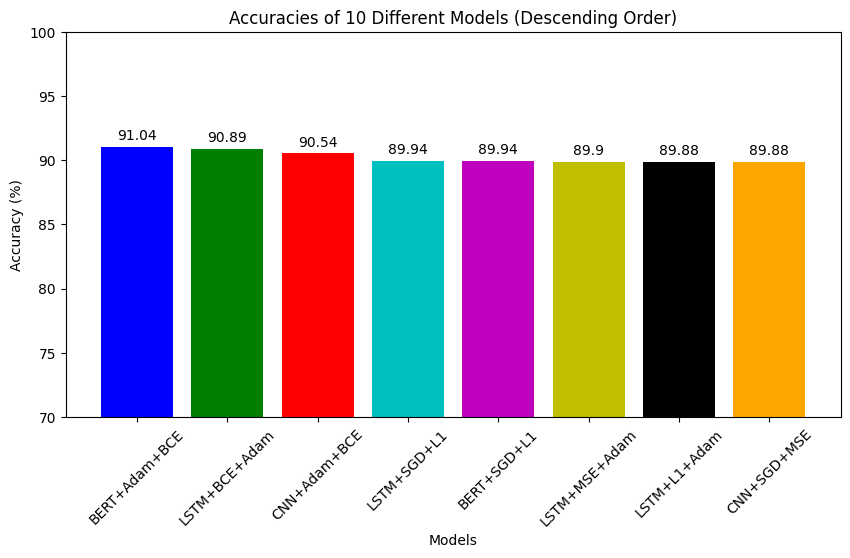

In [ ]:
import matplotlib.pyplot as plt


accuracies = [90.89,89.90,89.88,89.94,90.54,89.88,91.04,89.94]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500']
models = ['LSTM+BCE+Adam', 'LSTM+MSE+Adam', 'LSTM+L1+Adam', 'LSTM+SGD+L1', 'CNN+Adam+BCE', 'CNN+SGD+MSE', 'BERT+Adam+BCE', 'BERT+SGD+L1']
sorted_models_and_accuracies = sorted(zip(accuracies, models), reverse=True)
accuracies, models = zip(*sorted_models_and_accuracies)
plt.figure(figsize=[10,5])
bars=plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracies of 10 Different Models (Descending Order)')
plt.ylim([70, 100])
plt.xticks(rotation=45)
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.annotate(f'{accuracy}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()
